# Speech Recognition

## <span style="color: purple"> *presented to:**Dr. Mohamed Moselhy** <br>*
## <span style="color: purple"> *presented by: **Esraa Ashraf - Mai Essam - Mayar Mohsen**<br>*

In [1]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import scipy.signal as signal
import math


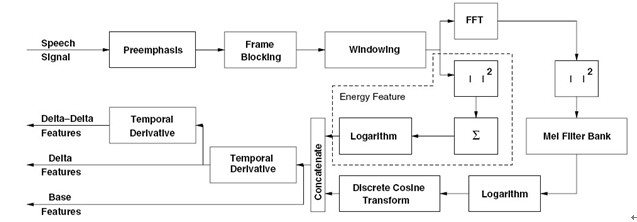

##  <span style="color: purple">  Pre_Emphasis 
#### A common pre-processing tool used to compensate for the average spectral shape is pre-emphasis, which emphasises higher frequencies. Typically, pre-emphasis is applied as a time-domain as shown in the following :

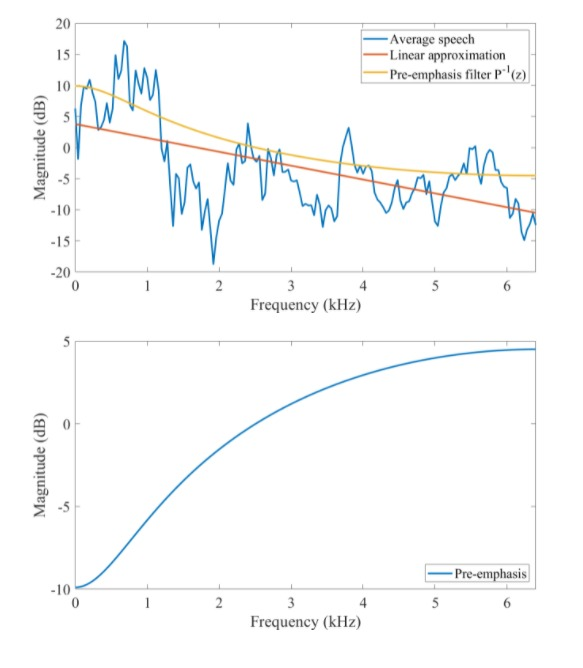

In [2]:
(rate,sig) = wav.read("clip_000b9514b.wav")
print(rate)
print(sig.shape)

16000
(16000,)


In [3]:
sig = signal.resample(sig,48000)
print('Number of samples afetr resampling:    ',sig.shape[0])
duration = len(sig)/rate
print('Duration of first audio after resampling:   ',duration)



Number of samples afetr resampling:     48000
Duration of first audio after resampling:    3.0


##  <span style="color: purple">  Frame and window calculation
#### total samples = 48000
#### number of samples / frame = (48000/120) = 400 ; where 120 is the number of frames without overlaping (winlen = winstep)
#### hop length=400/(2.5)=160 ;        where 2.5 =winlen/winstep

In [4]:
mfcc_feat = mfcc(sig , rate, winlen=0.025, winstep=0.01, numcep=13, nfilt=26, nfft=2048,
                 lowfreq=0, highfreq=rate/2, preemph=0.97, ceplifter=22, appendEnergy=True, winfunc=np.hamming)
mfcc_feat.shape

(299, 13)

##  <span style="color: purple">  Parameters
- window length=25ms<br>
- window step =10ms      ;therefore  overlapping =15ms<br>
- Number of cepstral co-efficients=13<br>
- nfilt:the number of filters in the filterbank, default 26<br>
- FFT size: radix of 2=2048  ; where power=11<br>
- lowfreq : lowest band edge of mel filters. In Hz, default is 0.<br>
- highfreq : highest band edge of mel filters. In Hz, default is samplerate/2<br>
- preemph  : apply preemphasis filter with preemph as coefficient. Default is 0.97.<br>
- ceplifter : apply a lifter to final cepstral coefficients. 0 is no lifter. Default is 22.<br>
- appendEnergy : if this is true, the zeroth cepstral coefficient is replaced with the log of the total frame energy.<br>
- winfunc : the analysis window to apply to each frame ;  winfunc=numpy.hamming<br>

## Plotting MFCC co-efficients and their deltas

In [5]:
mfcc_feat = mfcc_feat.T

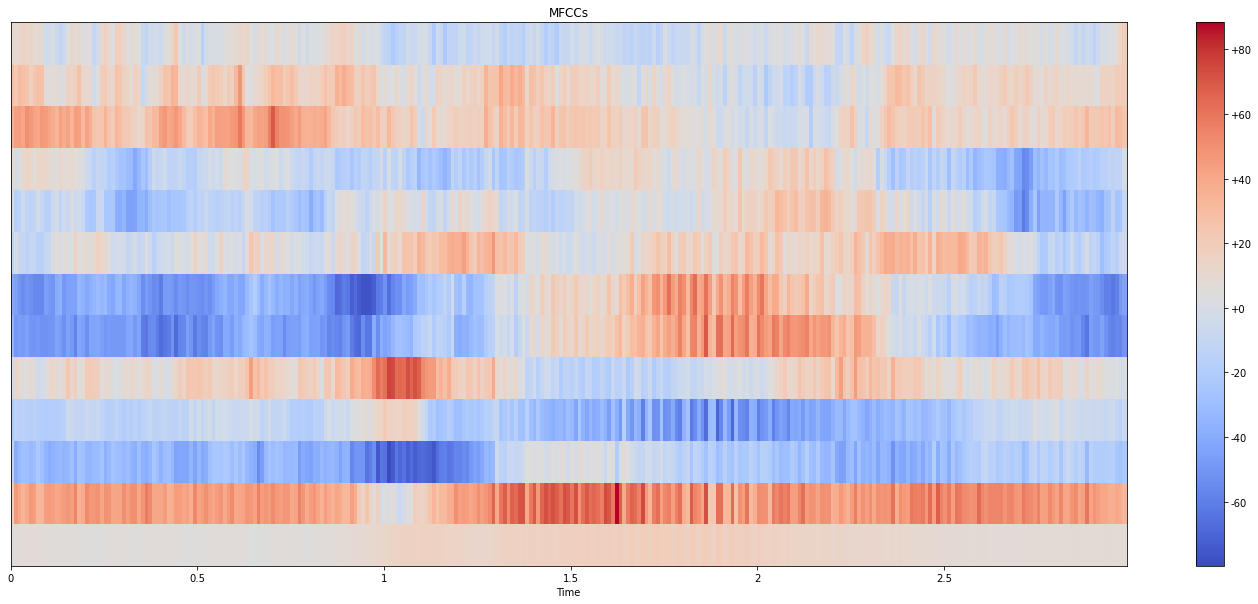

In [6]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfcc_feat, hop_length=160, x_axis="time", sr=rate)
plt.title('MFCCs')
plt.colorbar(format="%+2.f")
plt.show()

In [7]:
delta_mfccs = librosa.feature.delta(mfcc_feat)     # dynamic change in cepstral co-efficients

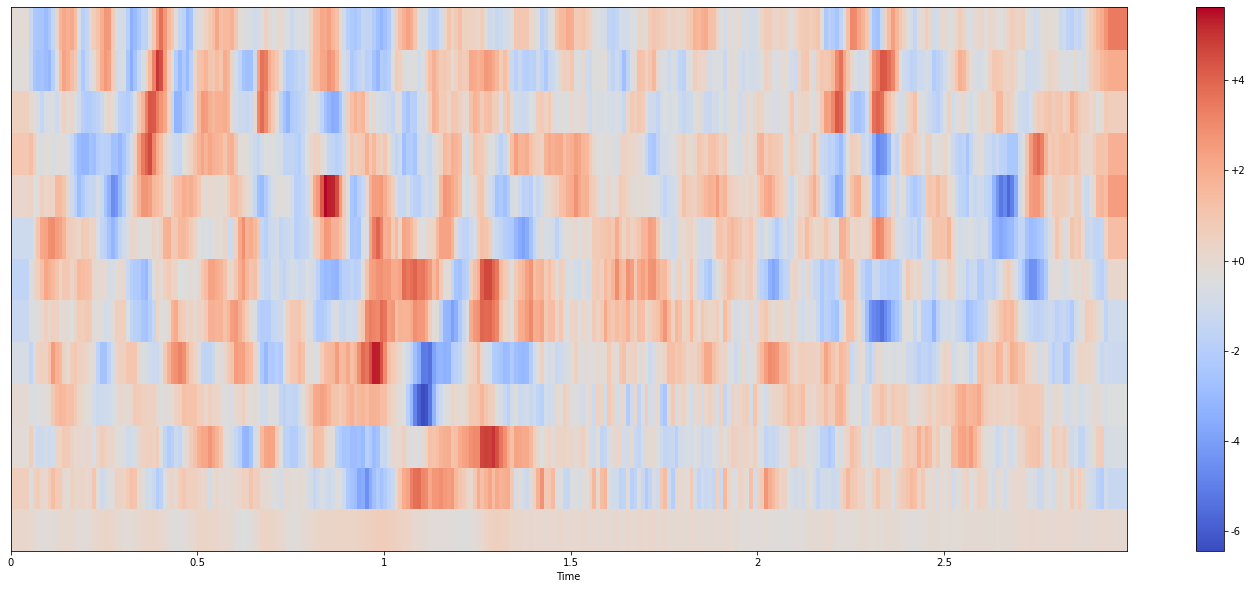

In [8]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs, hop_length=160, x_axis="time", sr=rate)
plt.colorbar(format="%+2.f")
plt.show()

In [9]:
delta2_mfccs = librosa.feature.delta(mfcc_feat, order=2)  # Acceleration change in cepstral co-efficients

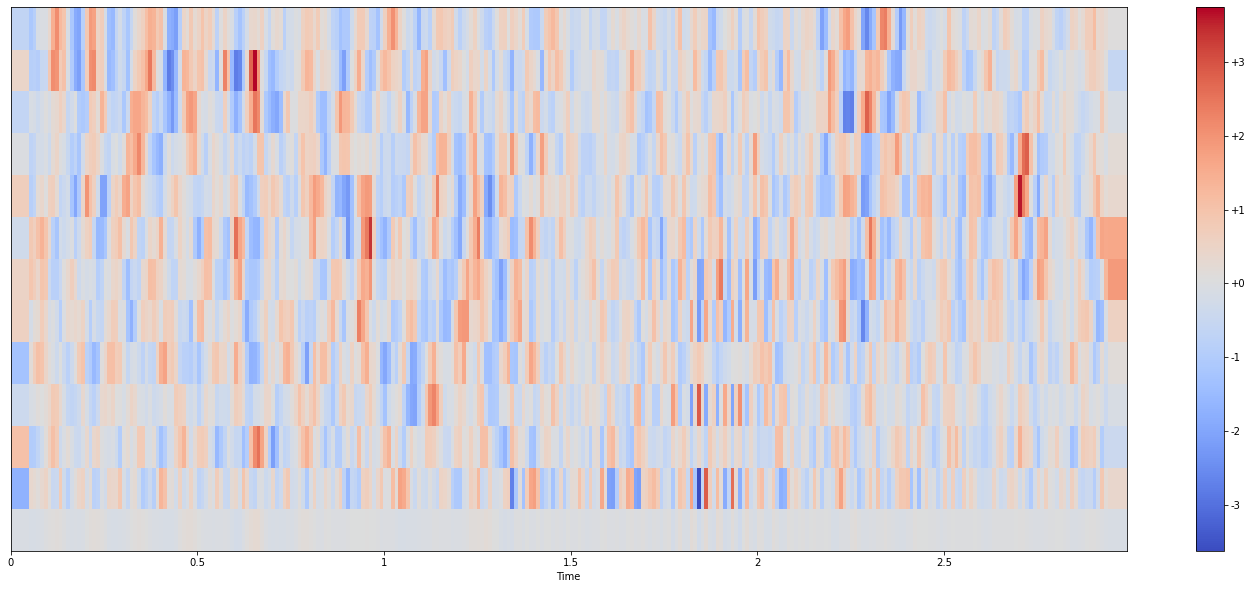

In [10]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs, hop_length=160, x_axis="time", sr=rate)
plt.colorbar(format="%+2.f")
plt.show()

In [11]:
mfccs_features = np.concatenate((mfcc_feat, delta_mfccs, delta2_mfccs))
print(delta_mfccs.shape)
print(mfccs_features.shape)       #Number of co-efficient increae by 3 times

(13, 299)
(39, 299)


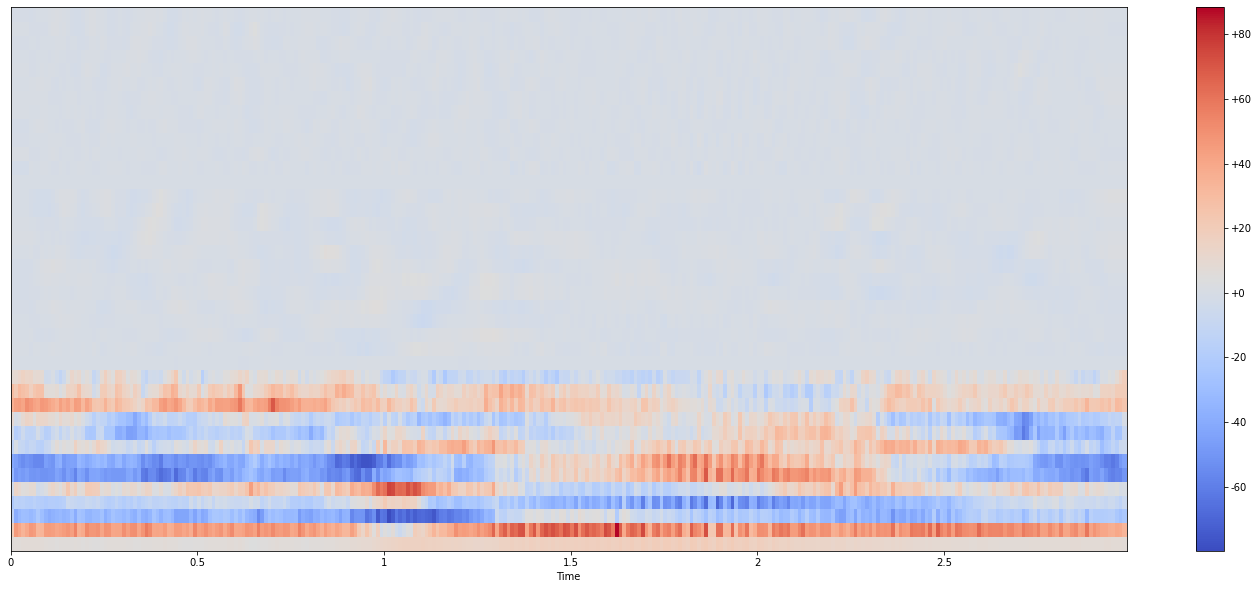

In [12]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs_features, hop_length=160, x_axis="time", sr=rate)
plt.colorbar(format="%+2.f")
plt.show()

In [13]:
(rate1,sig1) = wav.read("esraa.wav")
(rate2,sig2) = wav.read("mayar.wav")
(rate3,sig3) = wav.read("ahmed.wav")

print('sample rate of first signal:         ',rate1)
print('Number of samples in first signal:   ',sig1.shape[0])
print('sample rate of second signal:        ',rate2)
print('Number of samples in second signal:  ',sig2.shape[0])
print('sample rate of third signal:         ',rate3)
print('Number of samples in third signal:   ',sig3.shape[0])

sample rate of first signal:          48000
Number of samples in first signal:    94936
sample rate of second signal:         48000
Number of samples in second signal:   59416
sample rate of third signal:          48000
Number of samples in third signal:    84376


In [14]:
duration1 = len(sig1)/rate1
print('Duration of first audio before resampling:   ',duration1)
sig1 = signal.resample(sig1,48000)
print('Number of samples afetr resampling:          ',sig1.shape[0])
duration1 = len(sig1)/rate1
print('Duration of first audio after resampling:    ',duration1)

Duration of first audio before resampling:    1.9778333333333333
Number of samples afetr resampling:           48000
Duration of first audio after resampling:     1.0


In [15]:
duration2 = len(sig2)/rate2
print('Duration of second audio before resampling:   ',duration2)
sig2 = signal.resample(sig2,48000)
print('Number of samples afetr resampling:           ',sig2.shape[0])
duration2 = len(sig2)/rate2
print('Duration of Second audio after resampling:    ',duration2)

Duration of second audio before resampling:    1.2378333333333333
Number of samples afetr resampling:            48000
Duration of Second audio after resampling:     1.0


In [16]:
duration3 = len(sig3)/rate3
print('Duration of Third audio before resampling:   ',duration3)
sig3 = signal.resample(sig3,48000)
print('Number of samples afetr resampling:           ',sig3.shape[0])
duration3 = len(sig3)/rate3
print('Duration of Third audio after resampling:    ',duration3)

Duration of Third audio before resampling:    1.7578333333333334
Number of samples afetr resampling:            48000
Duration of Third audio after resampling:     1.0


<span style="color: black"> **total samples = 48000** <br>
<span style="color: black"> **number of samples / frame = (48000/40) = 1200 ; where 40 is the number of frames without overlaping (winlen = winstep)** <br>
<span style="color: black"> **hop_length = 1200/(0.025/0.01) = 480**
 

In [17]:
mfcc_feat1 = mfcc(sig1 , rate1, winlen=0.025, winstep=0.01, numcep=13, nfilt=26, nfft=2048,
                 lowfreq=0, highfreq=rate1/2, preemph=0.97, ceplifter=22, appendEnergy=True, winfunc=np.hamming)
mfcc_feat1.shape
mfcc_feat1 = mfcc_feat1.T
delta_mfccs1 = librosa.feature.delta(mfcc_feat1)
delta2_mfccs1 = librosa.feature.delta(mfcc_feat1, order=2)

## MFCCs of First signal

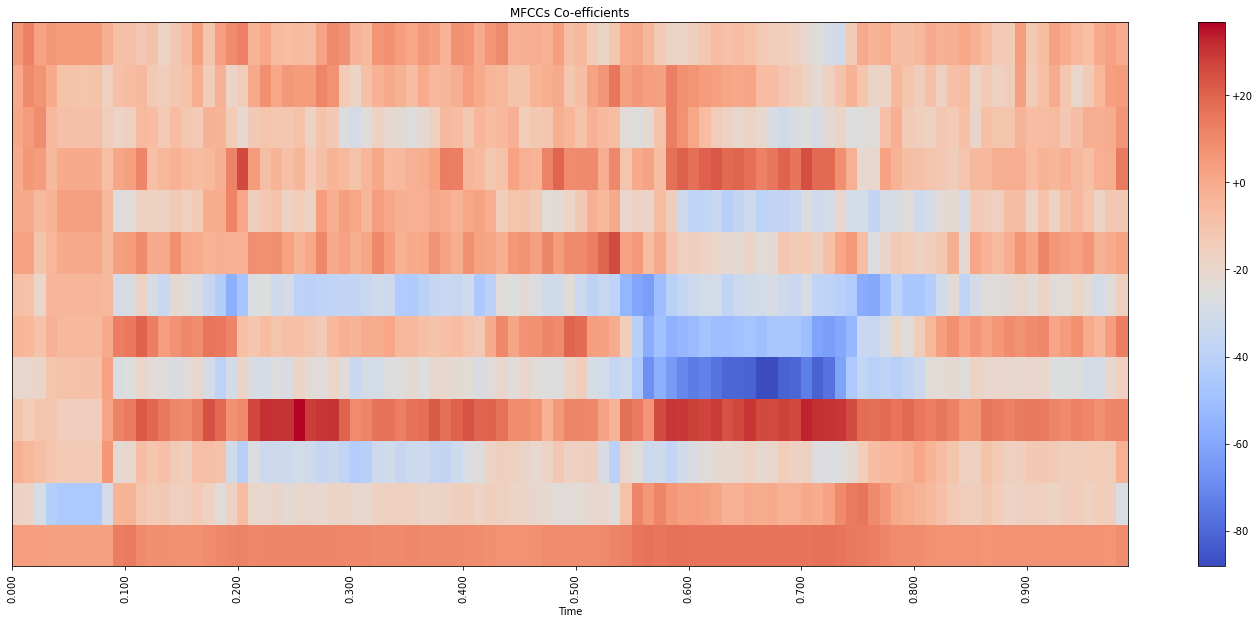

In [18]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfcc_feat1, hop_length=480, x_axis="time", sr=rate1)
plt.title("MFCCs Co-efficients")
plt.xticks(rotation = 90)
plt.colorbar(format="%+2.f")
plt.show()


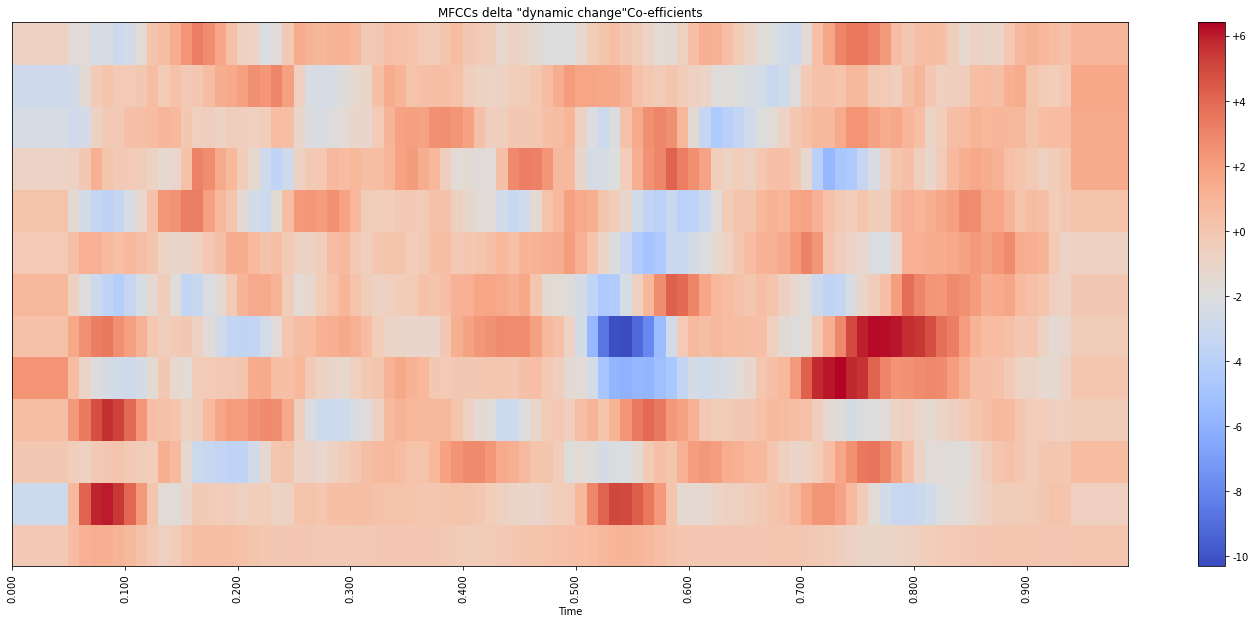

In [19]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs1, hop_length=480, x_axis="time", sr=rate1)
plt.title('MFCCs delta "dynamic change"Co-efficients')
plt.xticks(rotation = 90)
plt.colorbar(format="%+2.f")
plt.show()

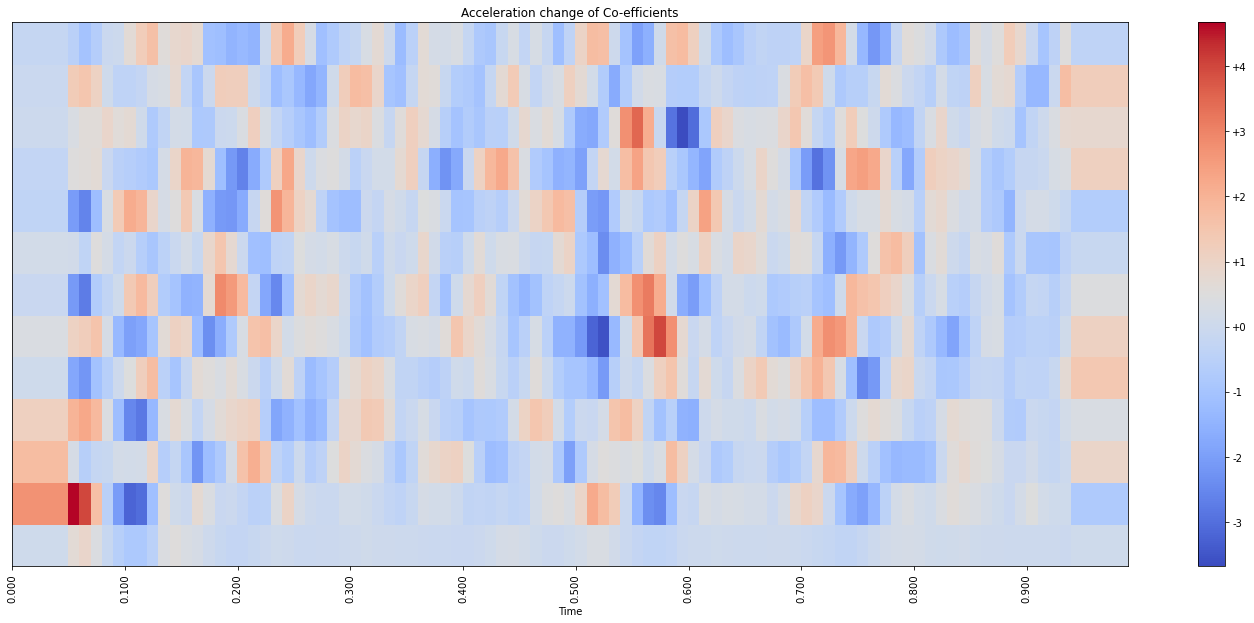

In [20]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs1, hop_length=480, x_axis="time", sr=rate1)
plt.title('Acceleration change of Co-efficients')
plt.xticks(rotation = 90)
plt.colorbar(format="%+2.f")
plt.show()

number of delta cofficients:    (13, 99)
number of total cofficients:    (39, 99)


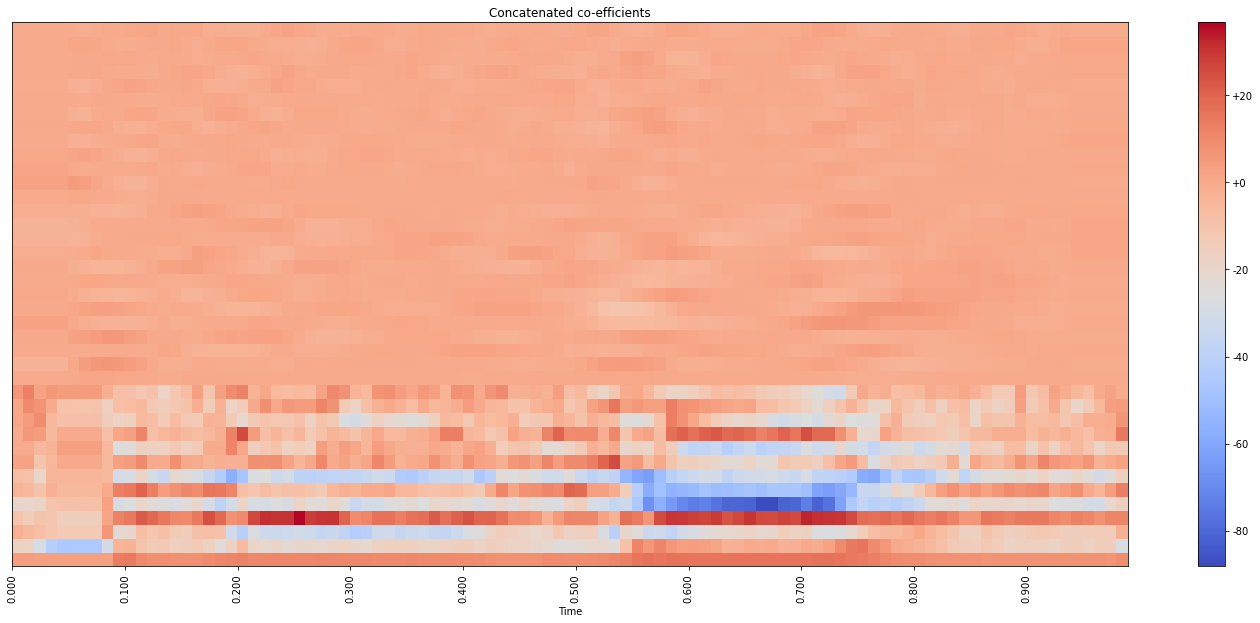

In [21]:
mfccs_features1 = np.concatenate((mfcc_feat1, delta_mfccs1, delta2_mfccs1))
print('number of delta cofficients:   ',delta_mfccs1.shape)
print('number of total cofficients:   ',mfccs_features1.shape)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs_features1, hop_length=480, x_axis="time", sr=rate1)
plt.title('Concatenated co-efficients')
plt.xticks(rotation = 90)
plt.colorbar(format="%+2.f")
plt.show()

## MFCCs of Second Signal

In [22]:
mfcc_feat2 = mfcc(sig2 , rate2, winlen=0.025, winstep=0.01, numcep=13, nfilt=26, nfft=2048,
                 lowfreq=0, highfreq=rate2/2, preemph=0.97, ceplifter=22, appendEnergy=True, winfunc=np.hamming)
mfcc_feat2.shape
mfcc_feat2 = mfcc_feat2.T
delta_mfccs2 = librosa.feature.delta(mfcc_feat2)
delta2_mfccs2 = librosa.feature.delta(mfcc_feat2, order=2)

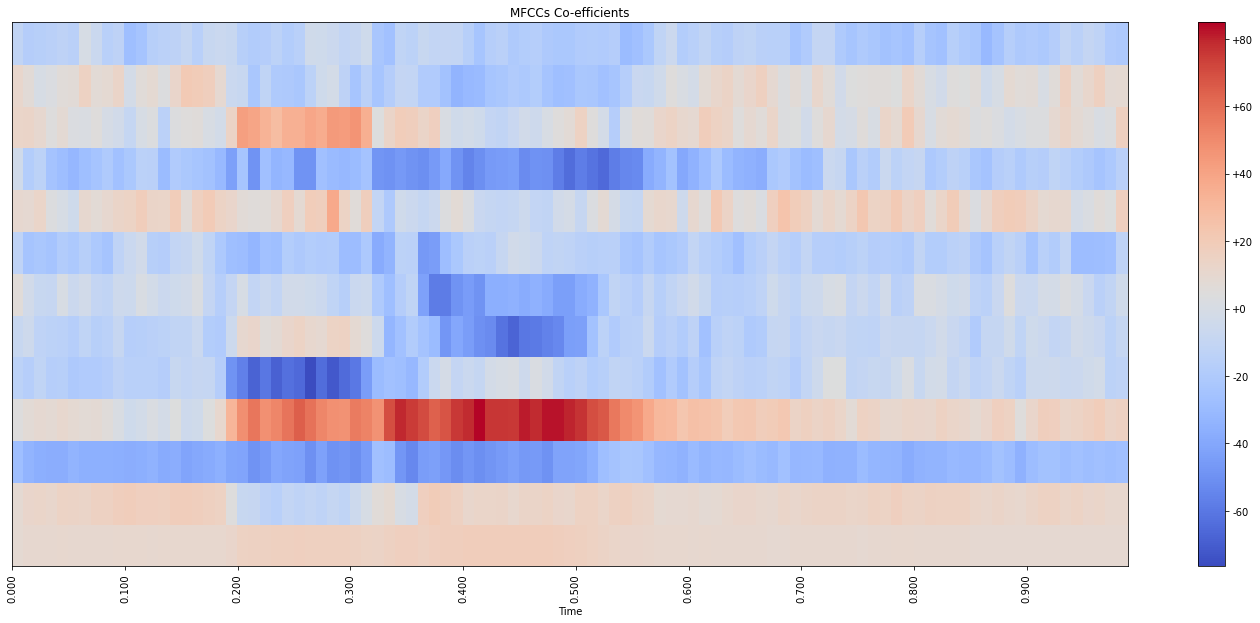

In [23]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfcc_feat2, hop_length=480, x_axis="time", sr=rate2)
plt.title("MFCCs Co-efficients")
plt.xticks(rotation = 90)
plt.colorbar(format="%+2.f")
plt.show()

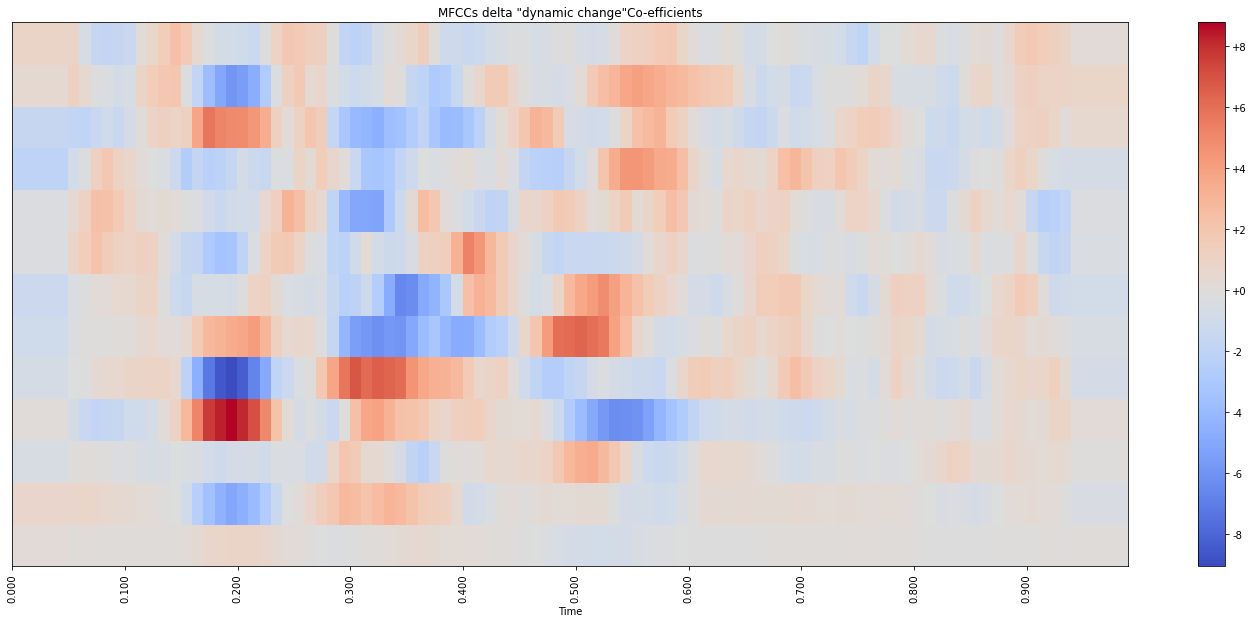

In [24]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs2, hop_length=480, x_axis="time", sr=rate2)
plt.title('MFCCs delta "dynamic change"Co-efficients')
plt.xticks(rotation = 90)
plt.colorbar(format="%+2.f")
plt.show()

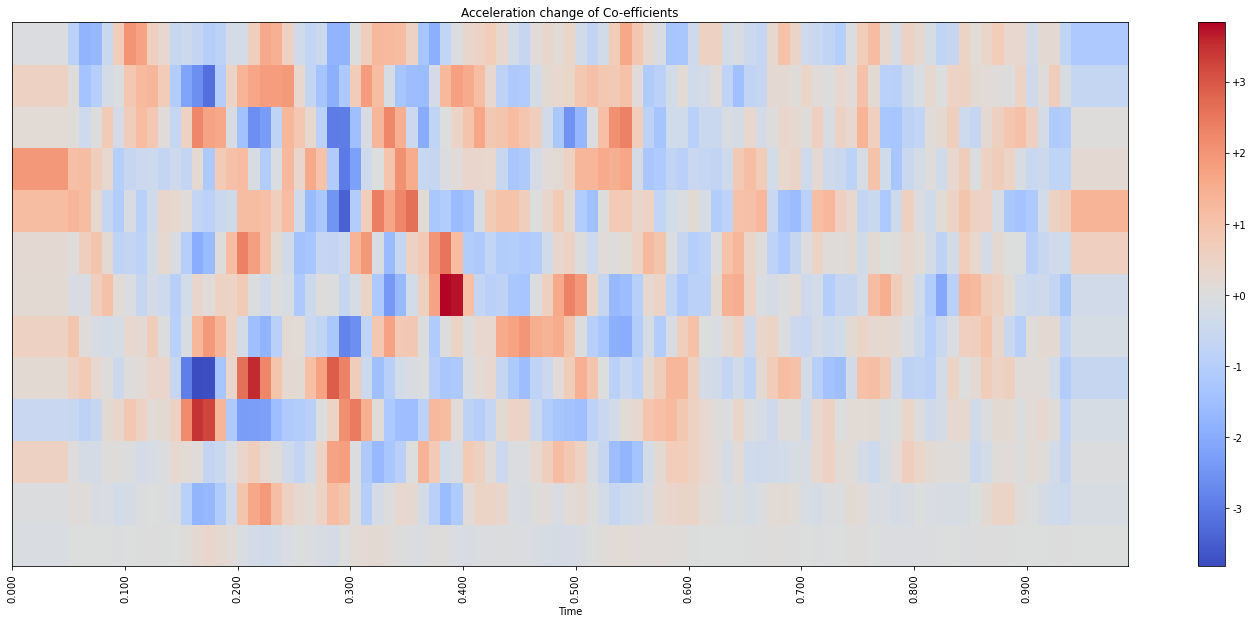

In [25]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs2, hop_length=480, x_axis="time", sr=rate2)
plt.title('Acceleration change of Co-efficients')
plt.xticks(rotation = 90)
plt.colorbar(format="%+2.f")
plt.show()

number of delta cofficients:    (13, 99)
number of total cofficients:    (39, 99)


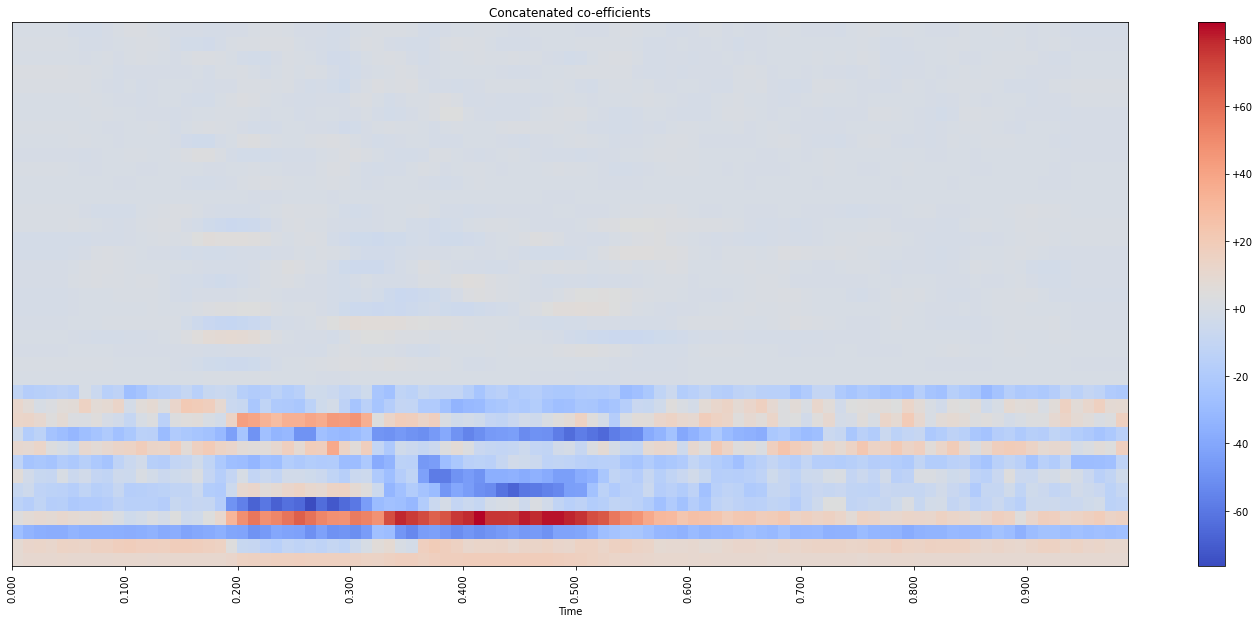

In [26]:
mfccs_features2 = np.concatenate((mfcc_feat2, delta_mfccs2, delta2_mfccs2))
print('number of delta cofficients:   ',delta_mfccs2.shape)
print('number of total cofficients:   ',mfccs_features2.shape)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs_features2, hop_length=480, x_axis="time", sr=rate2)
plt.title('Concatenated co-efficients')
plt.xticks(rotation = 90)
plt.colorbar(format="%+2.f")
plt.show()

## MFCCs of Third Signal

In [27]:
mfcc_feat3 = mfcc(sig3 , rate3 , winlen=512/rate3 , winstep=256/rate3 , numcep=13 , nfilt=40 , nfft=512 ,
                lowfreq=0, highfreq=rate3/2, preemph=0.97, ceplifter=22, appendEnergy=True, winfunc=np.hamming)
print(mfcc_feat3.shape)

(187, 13)


In [28]:
mfcc_feat3 = mfcc_feat3.T
delta_mfccs3 = librosa.feature.delta(mfcc_feat3)
delta2_mfccs3 = librosa.feature.delta(mfcc_feat3, order=2)

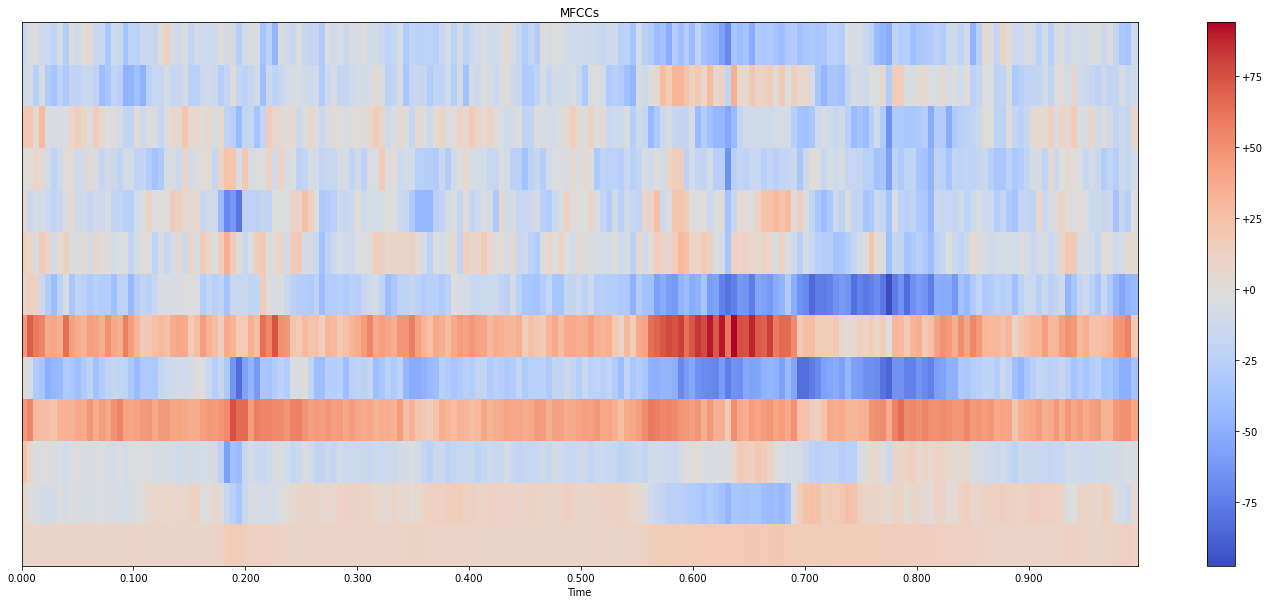

In [29]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfcc_feat3, hop_length=256, x_axis="time", sr=rate3)
plt.title('MFCCs')
plt.colorbar(format="%+2.f")
plt.show()

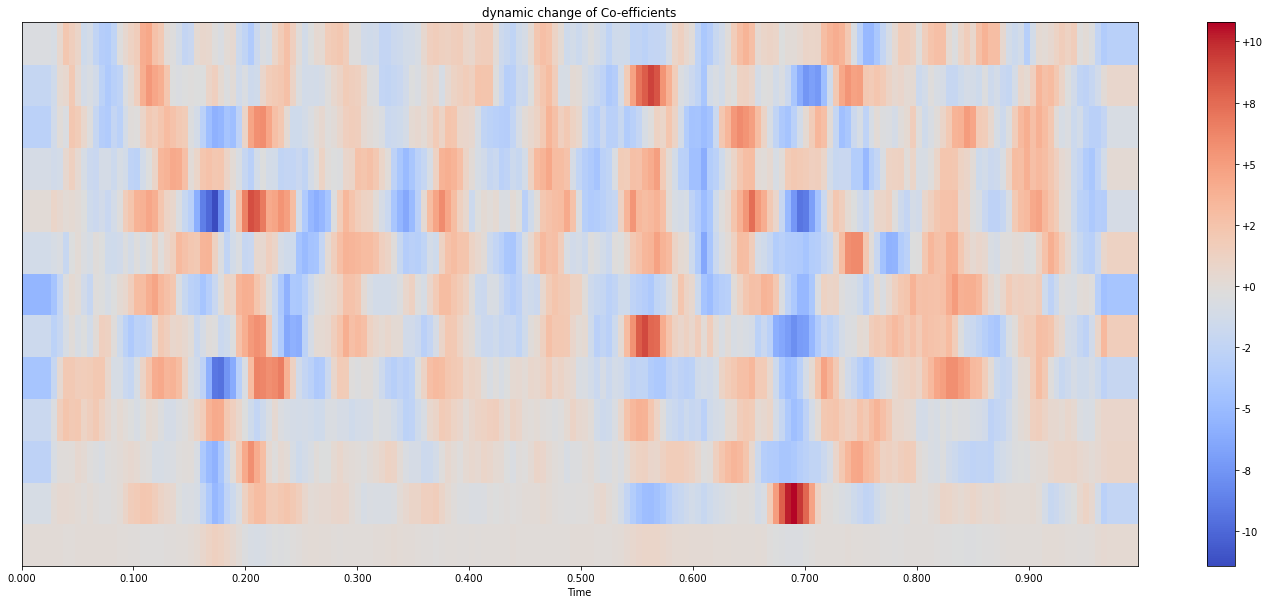

In [30]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs3, hop_length=256, x_axis="time", sr=rate3)
plt.title('dynamic change of Co-efficients')
plt.colorbar(format="%+2.f")
plt.show()

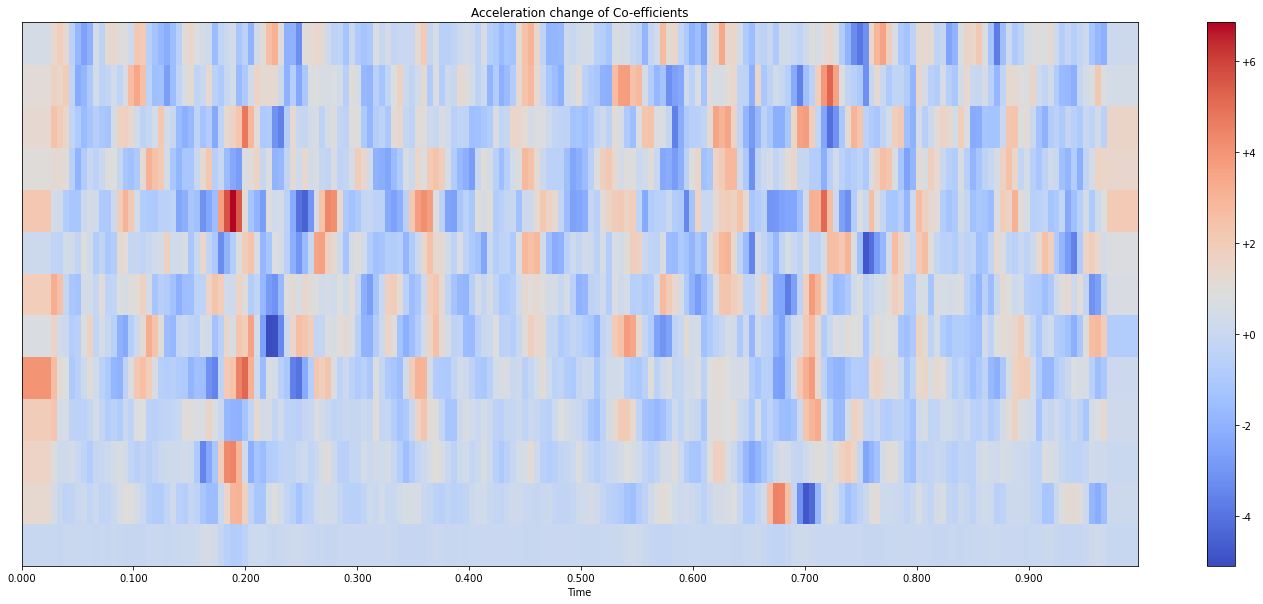

In [31]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs3, hop_length=256, x_axis="time", sr=rate3)
plt.title('Acceleration change of Co-efficients')
plt.colorbar(format="%+2.f")
plt.show()

number of delta cofficients:    (13, 187)
number of total cofficients:    (39, 187)


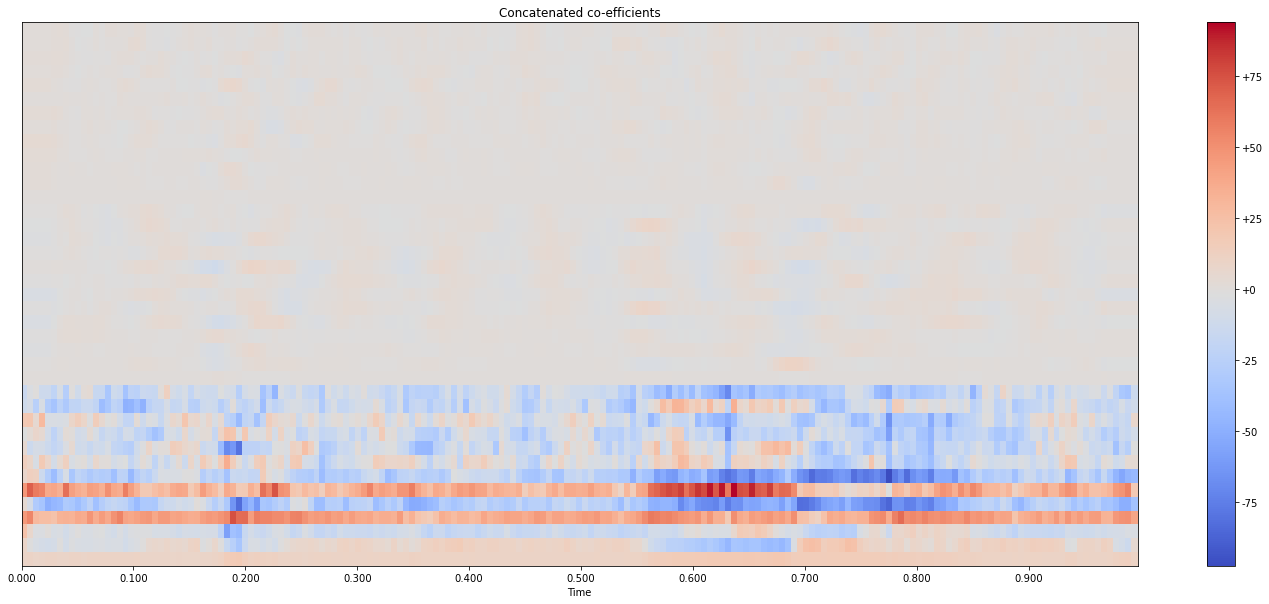

In [32]:
mfccs_features3 = np.concatenate((mfcc_feat3, delta_mfccs3, delta2_mfccs3))
print('number of delta cofficients:   ',delta_mfccs3.shape)
print('number of total cofficients:   ',mfccs_features3.shape)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs_features3, hop_length=256, x_axis="time", sr=rate3)
plt.title('Concatenated co-efficients')
plt.colorbar(format="%+2.f")
plt.show()

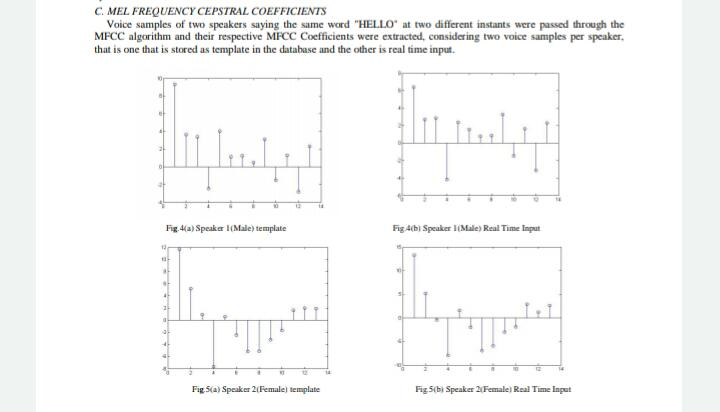

## Refrences
- Pre-emphasis Filter: <br>
https://wiki.aalto.fi/display/ITSP/Pre-emphasis#:~:text=Typically%2C%20pre-emphasis%20is%20applied%20as%20a%20time-domain%20FIR,of%20this%20filter%20is%20illustrated%20on%20the%20right.
- function documentation:<br>
https://python-speech-features.readthedocs.io/en/latest/
- International Journal of Innovative Research in Advanced Engineering (IJIRAE) ISSN: 2349-2163
 Volume 1 Issue 10 (November 2014): <br>
http://www.ijirae.com/
- 10.1.1596.8754.pdf : Integrating the energy information into mfcc